# Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps


In [1]:
# import the librarie
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load data set
df=pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 13-KNN/glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# EDA and Feature Engineering

In [3]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [4]:
# instead of assignming number to the type we can give the names to type as give in problem statement
df.loc[df['Type']==1,'Type']='building_windows_float_processed'
df.loc[df['Type']==2,'Type']='building_windows_non_float_processed'
df.loc[df['Type']==3,'Type']='vehicle_windows_float_processed'
df.loc[df['Type']==4,'Type']='vehicle_windows_non_float_processed'
df.loc[df['Type']==5,'Type']='containers'
df.loc[df['Type']==6,'Type']='tableware'
df.loc[df['Type']==7,'Type']='headlamps'
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:xlabel='Type', ylabel='count'>

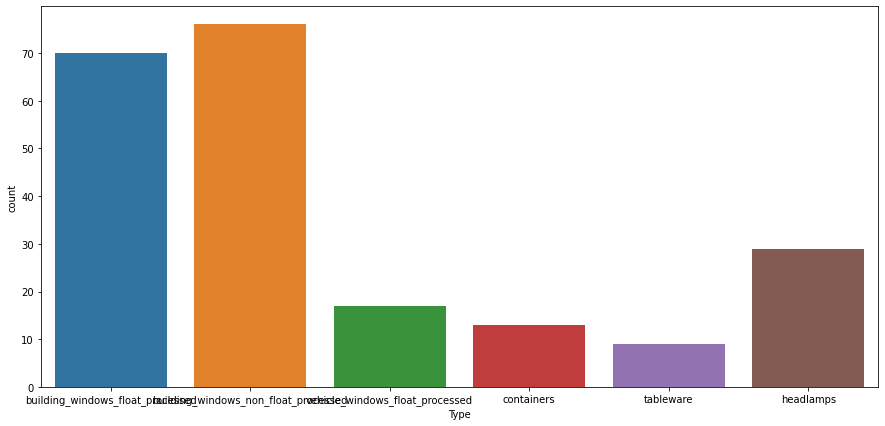

In [7]:
plt.rcParams['figure.figsize']=[15,7]
sns.countplot(x='Type',data=df)

# Observation:
    1. type2- building window non flot proceed are more valuea followed by building window flot proceed, headlamps respe.

In [8]:
df.columns


Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

RI       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Na    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Mg    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Al       AxesSubplot(0.125,0.391471;0.227941x0.222059)
Si    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
K     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Ca          AxesSubplot(0.125,0.125;0.227941x0.222059)
Ba       AxesSubplot(0.398529,0.125;0.227941x0.222059)
Fe       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

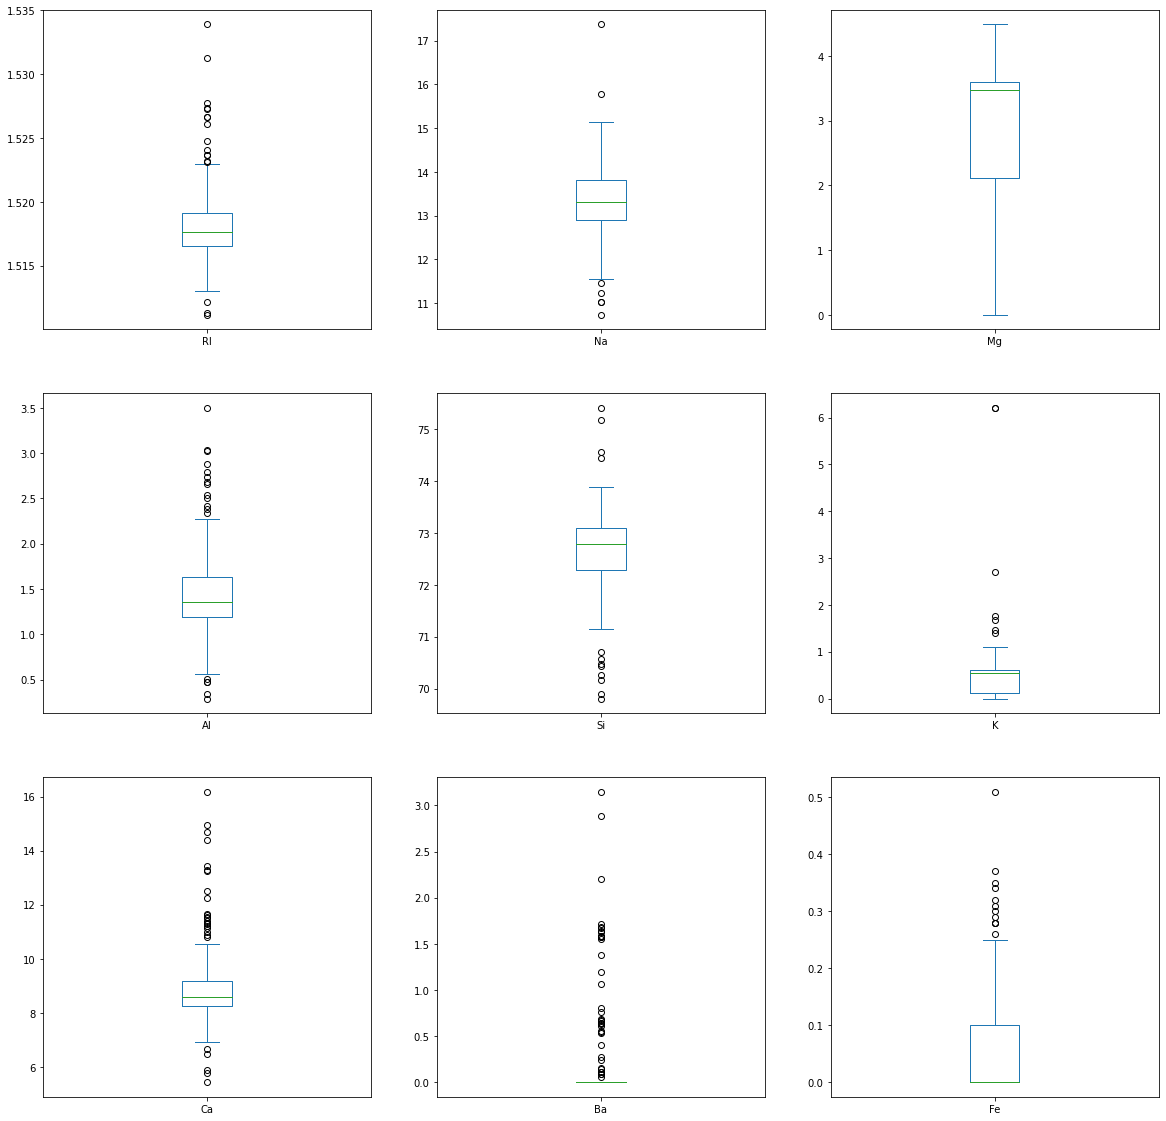

In [9]:
# checking for outliers in data set
df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].plot(kind='box',figsize=(20,20),subplots=True,layout=(3,3))

In [10]:
# finding correlation between various features
corr=df.corr(method='pearson')
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


<AxesSubplot:>

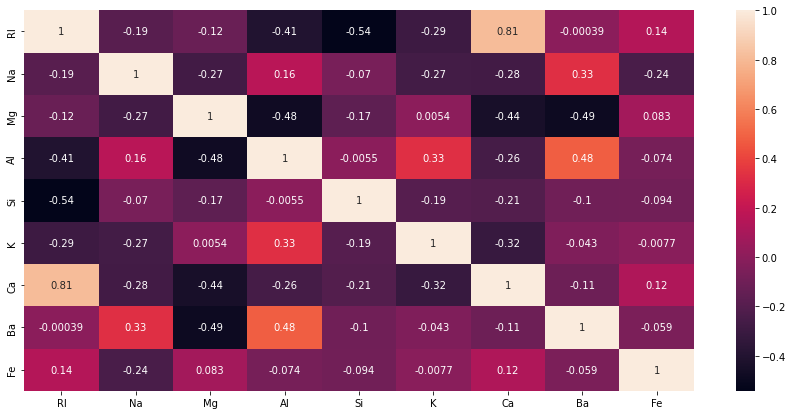

In [11]:
sns.heatmap(corr,annot=True)

# KNN
## finding the optimal values of K

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [13]:
x=np.array(df.iloc[:,0:9])
y=np.array(df['Type'])


In [14]:
x.shape

(214, 9)

In [15]:
y.shape

(214,)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
k_values=np.arange(1,25)
train_accuracy=[]
test_accuracy=[]

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:

for i, k in enumerate(k_values):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))                                 

([<matplotlib.axis.XTick at 0x2789e3b9880>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

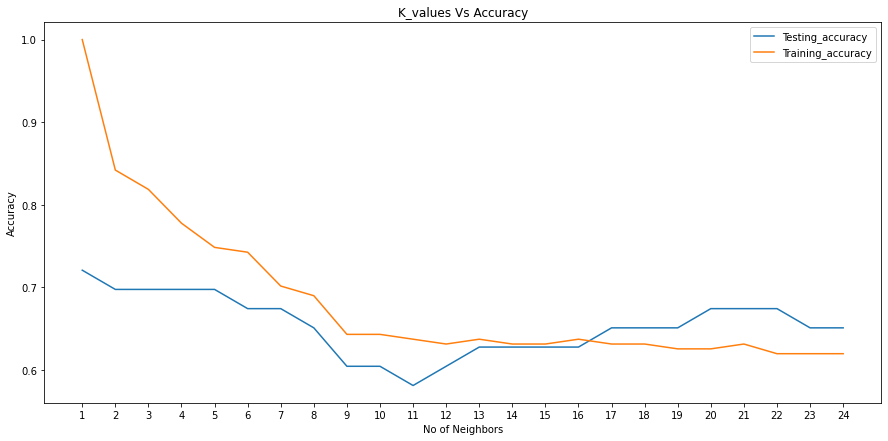

In [20]:
plt.figure(figsize=[15,7])
plt.plot(k_values,test_accuracy,label='Testing_accuracy')
plt.plot(k_values,train_accuracy,label='Training_accuracy')
plt.legend()
plt.xlabel('No of Neighbors')
plt.ylabel('Accuracy')
plt.title('K_values Vs Accuracy')
plt.xticks(k_values)

# k =3 to 5 produces more accuracte result lets take K=4

## Building Model with K=4

In [21]:
knn=KNeighborsClassifier(n_neighbors=4)

In [22]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [23]:
from sklearn.model_selection import cross_val_score
knn_score=cross_val_score(knn,x,y,cv=10)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [24]:
knn_score

array([0.59090909, 0.5       , 0.72727273, 0.63636364, 0.66666667,
       0.80952381, 0.80952381, 0.38095238, 0.66666667, 0.66666667])

In [25]:
knn_score.mean()

0.6454545454545455

In [26]:
pred_Train=knn.predict(x_train)

In [27]:
pred_Train

array(['building_windows_float_processed', 'headlamps',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed', 'headlamps',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed', 'containers',
       'building_windows_non_float_processed', 'headlamps',
       'building_windows_float_processed', 'headlamps', 'headlamps',
       'building_windows_non_float_processed',
       'building_windows_non_float_processed',
       'building_windows_non_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed', 'headlamps',
       'building_windows_non_float_processed',
       '

In [28]:
# finding accuracy score for train data
from sklearn.metrics import accuracy_score
accuracy_score(y_train,pred_Train)

0.7777777777777778

In [29]:
#confusion matrix for train data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred_Train)

array([[47,  3,  0,  0,  0,  1],
       [12, 49,  1,  0,  0,  2],
       [ 0,  2,  9,  1,  0,  0],
       [ 1,  1,  1, 21,  1,  0],
       [ 0,  0,  1,  2,  5,  0],
       [ 7,  2,  0,  0,  0,  2]], dtype=int64)

In [30]:
pred_test=knn.predict(x_test)
pred_test

array(['containers', 'headlamps', 'building_windows_non_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed', 'headlamps',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_floa

In [31]:
# finding accuracy score for test data

accuracy_score(y_test,pred_test)

0.6976744186046512

# knn model accuracy score for training is 77% and over test data it is 69.8 % 